# Pointilism usage examples

## Import class definitions

In [18]:
from pointillism import pointillize, pointillizeStack
%run pointillism.py

# Usage examples

## 1) Read image or directory of images, run routines, save

images/IMG_0290.jpg


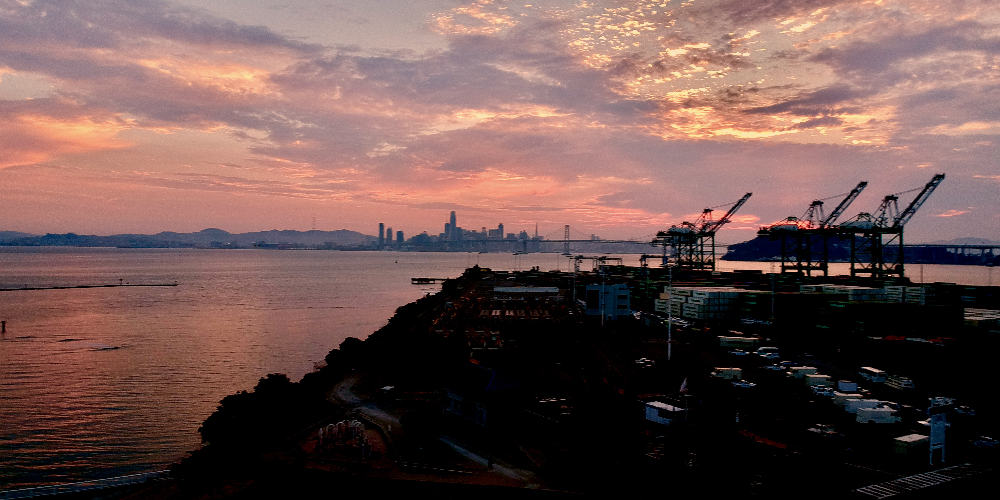

In [19]:
# Create instance on directory or filename
point = pointillize(location='images/IMG_0290.jpg', debug = True)

# Crop
point.crop_Y([1000,500], False)

# Display original
point.display(original=True)

In [20]:
# Plot rectangular grid of overlapping circles to fill canvas
point.plotRecPoints(step=40, r=40, fill=False)

# Plot many random points with size proportional to area complexity
point.plotRandomPointsComplexity(n=1e4, constant=0.01, power=1.3)  

plotRecPoints took 2.68 sec
plotRandomPointsComplexity took 7.63 sec


images/IMG_0290.jpg


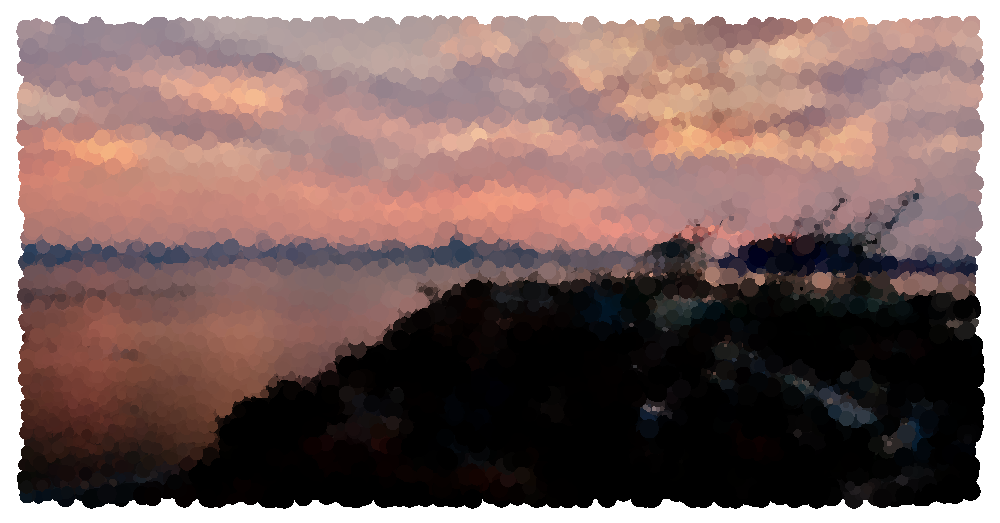

In [21]:
# Display and save
point.display()
point.save_out(location = 'images_out', suffix = 'basic test')

## 3) Build image stacks using pipeline and save as gif of intermediate images

In [22]:
# Create instance
point = pointillizeStack(location='images/IMG_0290.jpg', debug = True, border = 0)
point.crop_Y([500,250], False)

# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.plotRecPoints,[25, 25, False],1)
point.add_to_queue(point.plotRandomPointsComplexity,[1e3,0.01,1.3],10)

# Build image stacks
point.build_stacks(n=1, save_steps=True)

plotRecPoints: 1 done
plotRandomPointsComplexity: 1 2 3 4 5 6 7 8 9 10 done


In [23]:
# Save
point.save_gif('gifs/animated_stacking.gif', step_duration=0.25)

In [24]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking.gif">')

## 4) Build image stacks using pipeline and save as gif of final images

In [25]:
# Construct queue
point.new_queue()

# Add to queue
point.add_to_queue(point.plotRecPoints,[25, 25, False],1)
point.add_to_queue(point.plotRandomPointsComplexity,[1e4,0.01,1.3],1)

# Build image stacks
point.build_stacks(n=10, save_steps=False)

Building image:  0 1 2 3 4 5 6 7 8 9 done


In [26]:
# Save
point.save_gif('gifs/animated_stacking_loop.gif', step_duration=0.1)

In [27]:
# Display
from IPython.display import HTML
HTML('<img src="gifs/animated_stacking_loop.gif">')

# <--Working section below  --->

# Notes and To Do's
* Look into reading in movies, and saving gifs as movies



In [28]:
%run pointillism.py

# Create instance
point = pointillizeStack(location='images/IMG_0290.jpg', debug = True)

# Print attributes
point.print_attributes()

filenames :  ['images/IMG_0290.jpg']
images :  [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3968x2976 at 0x2109493F898>]
arrays : 1  numpy array(s)   
border :  100
outs :  [<PIL.Image.Image image mode=RGBA size=4168x3176 at 0x2109496F518>]
debug :  True
params :  {'complexity_radius': 10}


In [29]:
import pointillism
help(pointillism)

Help on module pointillism:

NAME
    pointillism - This module contains classes that help create pointillized images.

CLASSES
    builtins.object
        pointillize
            pointillizeStack
    
    class pointillize(builtins.object)
     |  Base class for pointillzation project
     |  
     |  Methods defined here:
     |  
     |  __init__(self, *args, **kwargs)
     |      Initiialize with image or directory
     |  
     |  crop_Y(self, aspect, resize)
     |      Crops and resizes in the height dimension to match aspect ratio
     |  
     |  display(self, **kwargs)
     |      Displays browser-size version of outputs, or original images
     |      if original=True
     |  
     |  plotRandomPoints(self, n, constant, power)
     |      Plots n random points over image, where constant is the portion
     |      of the image width for the max size of the bubble, and power > 1
     |      pushing the distribution towards smaller bubbles for increasing
     |      complexity,